# Quasidynamic earthquake simulation plotting

Here, we'll make some useful plots to see what happened in the QD simulation from `fullspace_qd_run.ipynb`.

First, let's import our tools!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import qd
import qd.plotting
qd.configure(
    gpu_idx = 0, # Which GPU to use if there are multiple. Best to leave as 0. 
    fast_plot = True, # Let's make fast, inexpensive figures. Set to false for higher resolution plots with latex fonts. 
)

Now, we load the data from the previous run. Check what folder was created! If you ran the simulation code multiple times, each time a new folder will be created in sequential order (data0, data1, data2, ...). 

In [2]:
folder_name = 'data0'
data = qd.load(folder_name, qd.FullspaceModel)

It can be nice to make some figures while the simulation is still running. For long running, large simulations, it's expensive to reload all the data, so `load_new_files()` allows updating the data object with any new time steps that have been completed and saved. By default, results are saved in 100 time step chunks. Look in the `data0` folder to see.

In [3]:
data.load_new_files()

Create the plotting object. This process the data a bit to make field like slip and velocity easier to plot.

In [4]:
qdp = qd.plotting.QDPlotData(data)

The `summary()` function makes four useful plots that show the overall evolution of the fault:

1. The minimum state variable value on the fault as a function of time.
2. The $log_{10}$ of the maximum slip rate on the fault as a function of time.
3. The time as a function of time step index.
4. The time step size as a function of time step index.

From this summary, we can see that as the fault evolved, there were some slow slip events of growing magnitude until at approximate time 0.042, the fault ruptured for the first time. It ruptured again at time 0.047.

plotting 0.041906371046028436 years and 1000 time steps of data


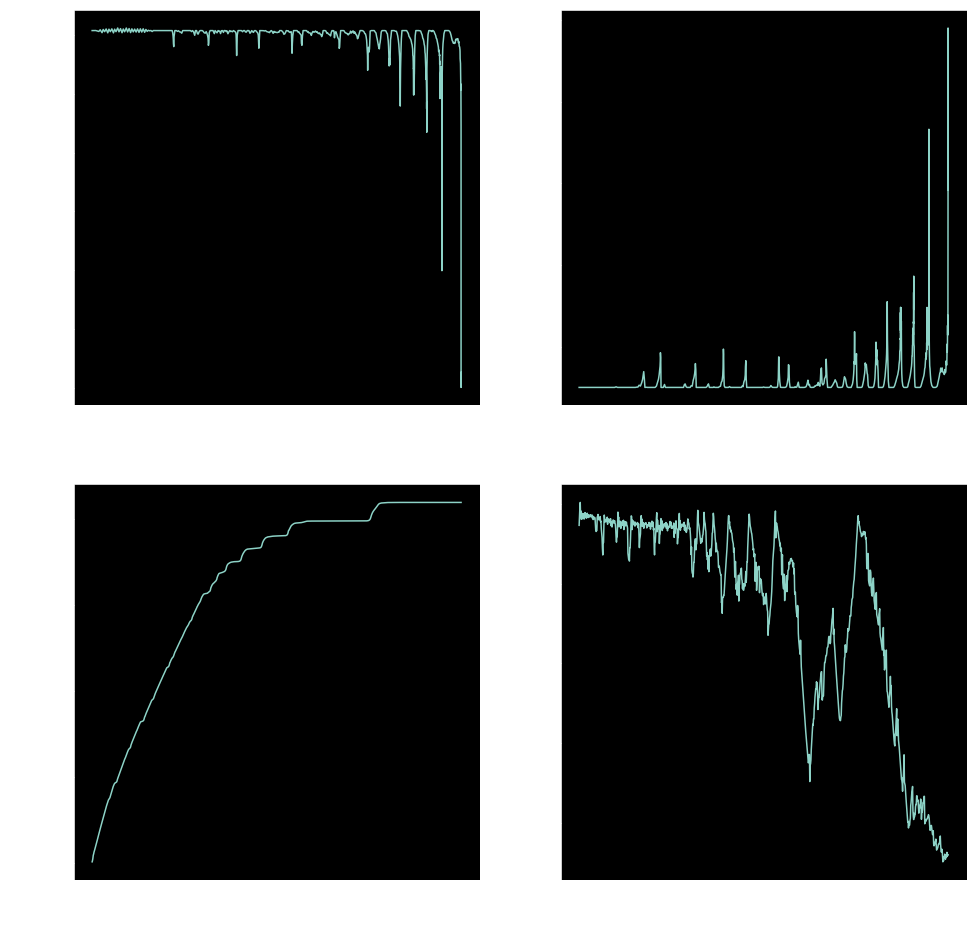

In [5]:
qdp.summary()

The `qdp.V_info` function provides the necessary values, levels, contour levels, and colormap to the `qdp.nicefig` function to make a handy figure of the state of the x component of slip rate at the 1050th time step. 

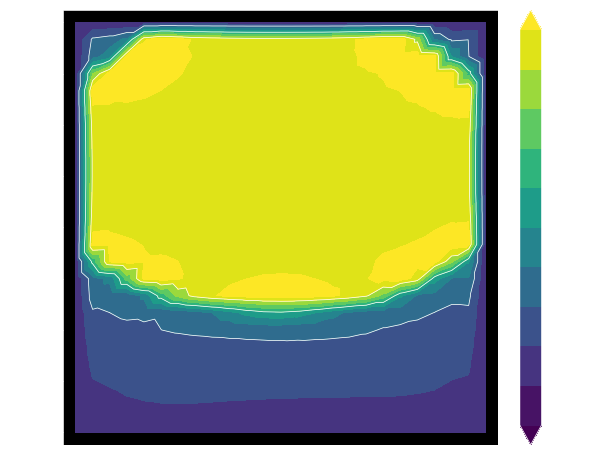

In [8]:
qdp.nicefig(*qdp.V_info(999), dim = [0,2])

Let's make a whole bunch of this same figure and turn them into a video. We'll make a figure every 4th step and name the final video `qd_video`. This should create a `qd_video0.mp4` file. Enjoy!

SystemError: <built-in method write of _io.BufferedWriter object at 0x7f96d2b6f888> returned a result with an error set

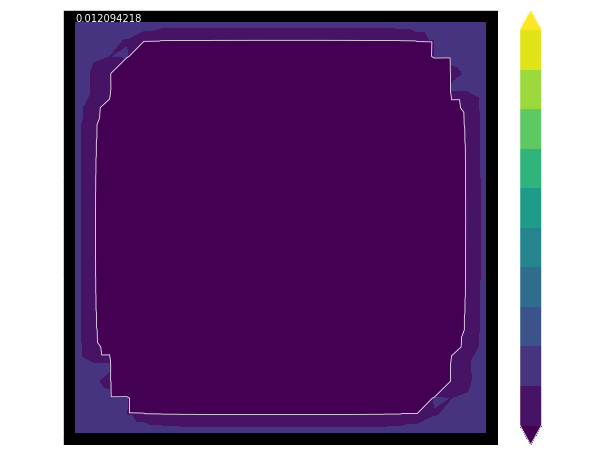

In [7]:
video_name = qdp.qd_video(range(1, qdp.n_steps, 4), qdp.V_info, video_prefix = 'qd_video', dim = [0,2])
qd.plotting.make_mp4(video_name)